In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import fashion_mnist


In [5]:
df = pd.read_csv('churn.csv')

In [94]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


In [7]:
df=df.drop_duplicates()


In [38]:
X = df[['CreditScore', 'EstimatedSalary', 'Balance','EstimatedSalary','Age']]
y = df['Exited']


In [11]:
y.value_counts()
#IMBALANCE DATA

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Exited'>

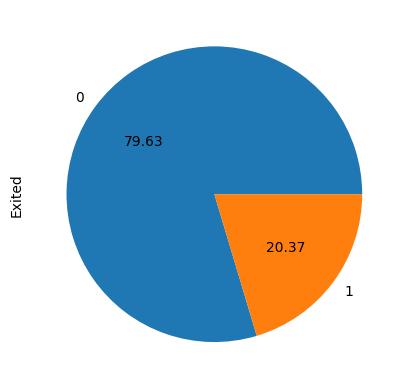

In [12]:
y.value_counts().plot.pie(autopct='%.2f')


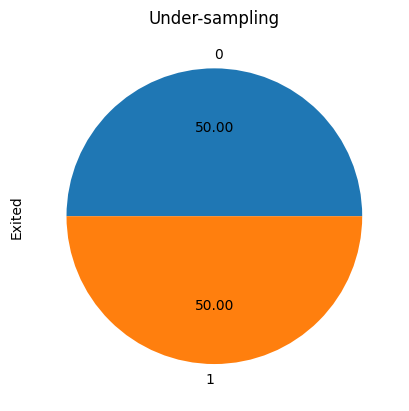

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [40]:
y_res.value_counts()


1    7963
0    7963
Name: Exited, dtype: int64

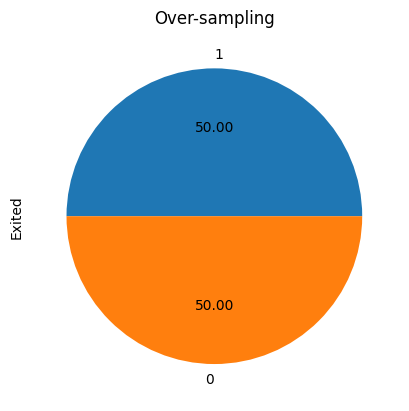

In [41]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply Min-Max scaling to specific columns
columns_to_normalize = ['CreditScore', 'EstimatedSalary','Balance']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115        0.538          0  Female   42   
1             2    15647311     1177        0.516          2  Female   41   
2             3    15619304     2040        0.304          0  Female   42   
3             4    15701354      289        0.698          0  Female   39   
4             5    15737888     1822        1.000          2  Female   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999        0.842          0    Male   39   
9996       9997    15569892     1336        0.332          0    Male   35   
9997       9998    15584532     1570        0.718          0  Female   36   
9998       9999    15682355     2345        0.844          1    Male   42   
9999      10000    15628319     2751        0.884          0  Female   28   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      

In [43]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Surname']= label_encoder.fit_transform(df['Surname'])

df['Surname'].unique()

array([1115, 1177, 2040, ..., 1366,   44,  363])

In [44]:
y_res.value_counts()


1    7963
0    7963
Name: Exited, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(x_test)


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    return acc, precision, recall, f1, auc

model_1 = evaluate_model(model, x_test, y_test)

print("Accuracy:", model_1[0])
print("Precision:", model_1[1])
print("Recall:", model_1[2])
print("F1 Score:",model_1[3])
print("AUC:", model_1[4])




Accuracy: 0.6894977168949772
Precision: 0.6901185770750988
Recall: 0.6730917501927525
F1 Score: 0.6814988290398126
AUC: 0.7374933890669503


# ANN Model

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [25]:
x_train = x_train/255.0
plt.xlabe_test = x_test/255.0

In [26]:
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)

In [27]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])


In [28]:
model1.fit(X_train, y_train, epochs =5)


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5258 - sparse_categorical_accuracy: 0.8131
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3979 - sparse_categorical_accuracy: 0.8546
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8670
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3434 - sparse_categorical_accuracy: 0.8740
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3287 - sparse_categorical_accuracy: 0.8783


In [30]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)


313/313 [==============================] - 2s 4ms/step - loss: 55.8407 - sparse_categorical_accuracy: 0.8508
